In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.kde import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap


In [3]:
DJ_daily=pd.read_csv('DJ_daily.csv').iloc[:,[0,-1]].rename(columns={'Last(Q.DJI)':'Last'})

DJ_daily=DJ_daily.reindex(index=DJ_daily.index[::-1]).reset_index(drop=True)


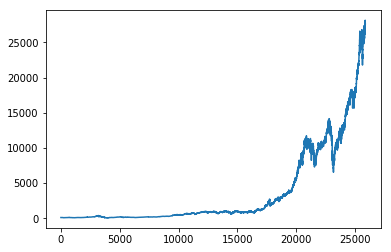

In [4]:
plt.plot(DJ_daily.Last)

In [5]:
DJ_daily.Date=pd.to_datetime(DJ_daily.Date,format='%d/%m/%Y')

# DJ_daily=DJ_daily[DJ_daily['Date']<'2014-1-1']
# DJ_weekly=DJ_weekly[DJ_weekly['Date']<'2014-1-1']
# DJ_yearly=DJ_yearly[DJ_yearly['Date']<'2014-1-1']

In [5]:

#DJ_daily=DJ_daily[DJ_daily['Date']<'1991-01-01']



In [6]:
daily_return=(np.log(DJ_daily.loc[1:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-1].values))
weekly_return=(np.log(DJ_daily.loc[5:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-5].values))
yearly_return=(np.log(DJ_daily.loc[250:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-250].values))
weekly_return=weekly_return/np.std(weekly_return)
yearly_return=yearly_return/np.std(yearly_return)

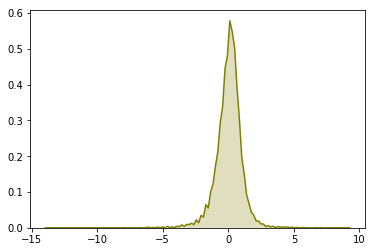

In [7]:
sns.kdeplot(weekly_return, shade=True, bw=.02,color="olive")

(-10, 10)

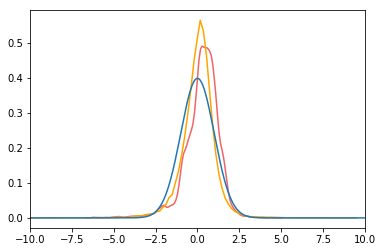

In [8]:
sns.kdeplot(yearly_return, shade=False, bw=.1,color="#ef6565")
sns.kdeplot(weekly_return, shade=False, bw=.1,color="orange")
# sns.distplot(yearly_return,bins=100)
# sns.distplot(weekly_return,bins=100)
x=np.linspace(-10,10,1000)
plt.plot(x, stats.norm.pdf(x, 0, 1))
plt.xlim((-10,10))


(0, 0.07)

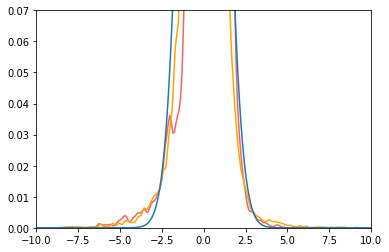

In [10]:
sns.kdeplot(yearly_return, shade=False, bw=.1,color="#ef6565")
sns.kdeplot(weekly_return, shade=False, bw=.1,color="orange")
# sns.distplot(yearly_return,bins=100)
# sns.distplot(weekly_return,bins=100)
plt.plot(x, stats.norm.pdf(x, 0, 1))
plt.xlim((-10,10))
plt.ylim((0,0.07))

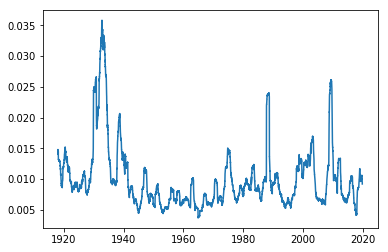

In [12]:

a=[]
for i in range(len(daily_return)-250):
    a.append(np.std(daily_return[i:i+250]))
plt.plot(DJ_daily.loc[251:,'Date'],a)

C:\Users\richard\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\richard\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\richard\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


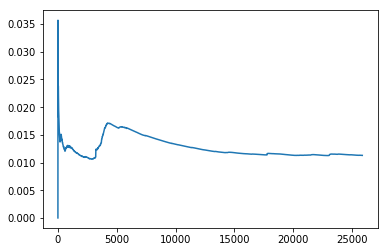

In [13]:
a=[]
for i in range(len(daily_return)):
    a.append(np.std(daily_return[:i]))
plt.plot(a)

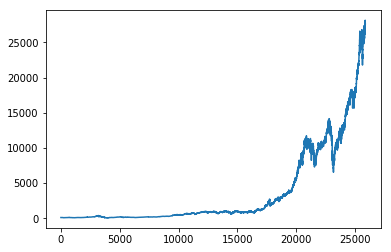

In [14]:
plt.plot(DJ_daily.Last)

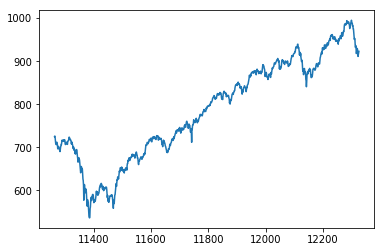

In [15]:
plt.plot(DJ_daily.loc[(DJ_daily['Date']>'1961-12-31') & (DJ_daily['Date']<'1966-3-20'),'Last'])

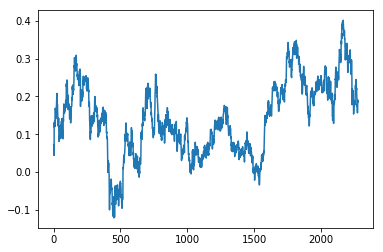

In [16]:
observation=DJ_daily.loc[(DJ_daily['Date']>='1988-1-1') & (DJ_daily['Date']<='1997-12-31'),'Last'].values
annual_ob=np.log(observation[250:])-np.log(observation[:-250])
fouryear_ob=np.log(observation[1000:])-np.log(observation[:-1000])
plt.plot(annual_ob)

1.000253753504748


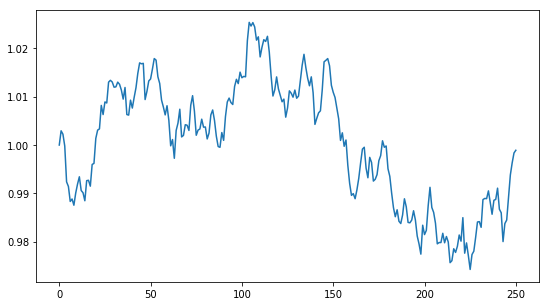

1.0001813691651131


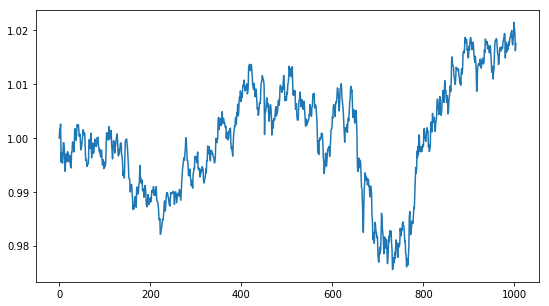

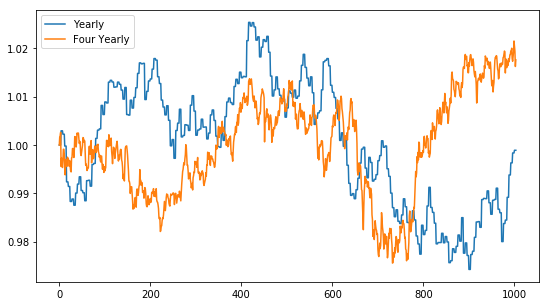

In [157]:

year=1988

def find_similarity(year,DJ_daily):
    result=[]
    for i in range(year,year+9):
        selected=DJ_daily.loc[(DJ_daily['Date']>='{}-1-1'.format(i)) & (DJ_daily['Date']<='{}-12-31'.format(i)),'Last'].values
        selected=np.array(selected[:251])
        selected=selected/selected[0]
        selected=selected/np.mean(selected)
        #print(np.mean(selected))
        selected=selected+[1-selected[0]]
        #print(np.mean(selected))
        result.append(selected)
    result=np.mean(result,axis=0)
    a=(np.mean(result)-1)*2/251
    C=np.array([i*a for i in range(251)])
    #plt.plot(result)
    result1=result-C
    plt.figure(figsize=(9,5))
    plt.plot(result1)
    print(np.mean(result-C))
    plt.show()

    result=[]
    for i in range(2):
        selected=DJ_daily.loc[(DJ_daily['Date']>='{}-1-1'.format(year+i*4)) & (DJ_daily['Date']<='{}-12-31'.format(year+3+i*4)),'Last'].values
        selected=np.array(selected[:251*4])
        selected=selected/selected[0]
        selected=selected/np.mean(selected)
        #print(np.mean(selected))
        selected=selected+[1-selected[0]]
        #print(np.mean(selected))
        result.append(selected)
    result=np.mean(result,axis=0)
    a=(np.mean(result)-1)*2/(251*4)
    C=np.array([i*a for i in range(251*4)])
    #plt.plot(result)
    result2=(result-C)/4
    result2=result2+[1-result2[0]]
    plt.figure(figsize=(9,5))
    plt.plot(result2)
    print(np.mean(result-C))
    plt.show()

    result1=[result1[i//4] for i in range(251*4)]
    plt.figure(figsize=(9,5))
    plt.plot(result1,label='Yearly')
    plt.plot(result2,label='Four Yearly')
    plt.legend()
    plt.show()
    return None
find_similarity(year,DJ_daily)

### Try to work on S&P 500

0.9997562074724138


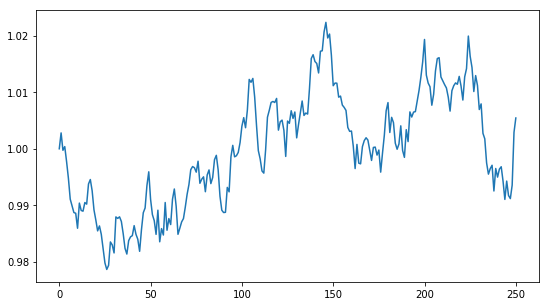

0.9997017824862401


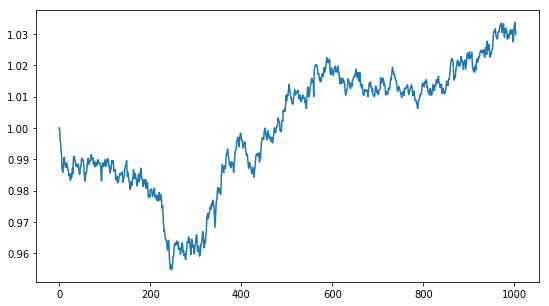

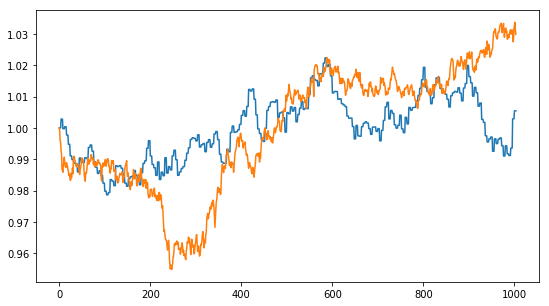

In [115]:
SP500=pd.read_csv('S&P 500.csv').loc[:,['Date','Close']].rename(columns={'Close':'Last'})

SP500=SP500.reindex(index=SP500.index[::-1]).reset_index(drop=True)
SP500.Date=pd.to_datetime(SP500.Date,format='%Y-%m-%d')
find_similarity(year,SP500)

### FTSE

1.0001621822384164


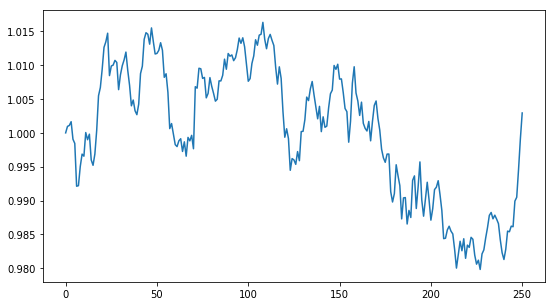

1.000175853329677


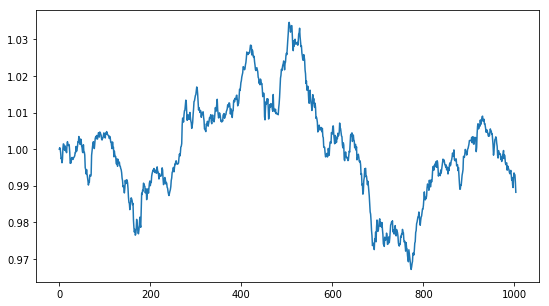

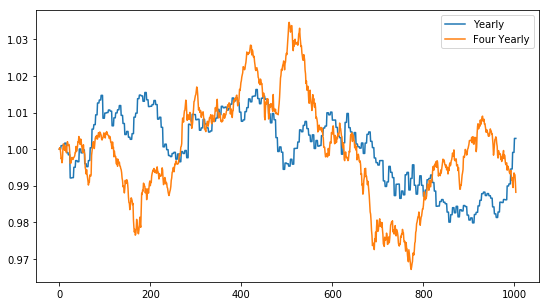

<module 'matplotlib.pyplot' from 'C:\\Users\\richard\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [158]:
FTSE=pd.read_csv('FTSE.csv').loc[:,['Date','Last(Q.FTAS)']].rename(columns={'Last(Q.FTAS)':'Last'})
FTSE.Date=pd.to_datetime(FTSE.Date,format='%d/%m/%Y')
FTSE=FTSE.reindex(index=FTSE.index[::-1]).reset_index(drop=True)
FTSE.iloc[:,1]= FTSE.iloc[:,1].str.replace(',', '')
FTSE.iloc[:,1]=pd.to_numeric(FTSE.iloc[:,1])
find_similarity(year,FTSE)
plt

In [154]:
FTSE.Date

0        11/02/1980
1        12/02/1980
2        13/02/1980
3        14/02/1980
4        15/02/1980
5        18/02/1980
6        19/02/1980
7        20/02/1980
8        21/02/1980
9        22/02/1980
10       25/02/1980
11       26/02/1980
12       27/02/1980
13       28/02/1980
14       29/02/1980
15       03/03/1980
16       04/03/1980
17       05/03/1980
18       06/03/1980
19       07/03/1980
20       10/03/1980
21       11/03/1980
22       12/03/1980
23       13/03/1980
24       14/03/1980
25       17/03/1980
26       18/03/1980
27       19/03/1980
28       20/03/1980
29       21/03/1980
            ...    
10036    05/11/2019
10037    06/11/2019
10038    07/11/2019
10039    08/11/2019
10040    11/11/2019
10041    12/11/2019
10042    13/11/2019
10043    14/11/2019
10044    15/11/2019
10045    18/11/2019
10046    19/11/2019
10047    20/11/2019
10048    21/11/2019
10049    22/11/2019
10050    25/11/2019
10051    26/11/2019
10052    27/11/2019
10053    28/11/2019
10054    29/11/2019


# Section 2: trading simulation

In [7]:
print(np.mean(daily_return))
print(np.std(daily_return))

0.00021812531841002524
0.011293926621092642


In [8]:
sigma
np.std(daily_return)

NameError: name 'sigma' is not defined

329 9


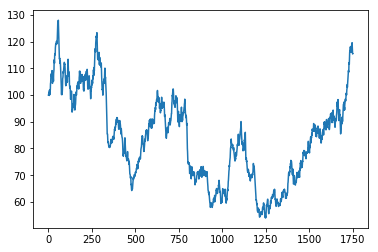

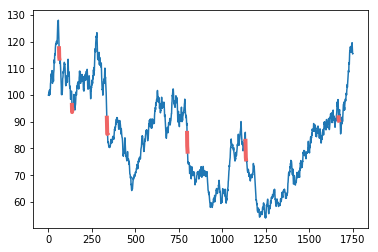

In [9]:
## r=0.05/250
# sigma=0.05/250




def new_price(R_t,r,sigma,a_s,a_l,a_m,d,days):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def h_l(x,R_t2,t_l):
        if x>t_l:
            return 0,-a_l*x
        else:
            return 1,-d

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.1*np.std(daily_return)
        t_l = np.mean(R_t[-10:])-1.1*np.std(tenday_return)
        long,h_long=h_l(x,R_t2,t_l)
        short,h_short=h_s(x,R_t2,t_s)
        
        #print(t_s,short,t_l,long,x)
        
        change=np.random.normal(r,sigma)+h_long+h_short+M(x)
        
        long_list[i]=long
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],long_list,short_list



np.random.seed(186)

tenday_return=(np.log(DJ_daily.loc[10:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-10].values))
r=np.mean(daily_return)
sigma=np.std(daily_return)
a_s=0.4
a_l=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=1750
d=0.018
price_change,long_list,short_list=new_price(R_t,r,sigma,a_s,a_l,a_m,d,days)
index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)
plt.plot(index)
print(sum(short_list),sum(long_list))
plt.show()
long_list=[0]+long_list+[0]
new_list=[np.nan for i in index]
for n,i in enumerate(index):
    if long_list[n]==1 or long_list[n-1]==1 or long_list[n+1]==1:
        new_list[n]=i
plt.plot(index)
plt.plot(new_list,color='#ef6565',lw=4)

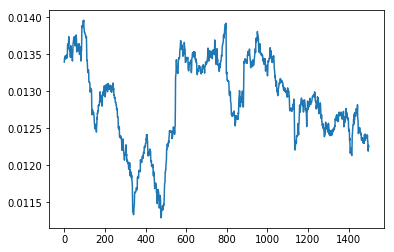

In [1625]:
volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]
plt.plot(volatility1)


In [1626]:
len(index)

1751

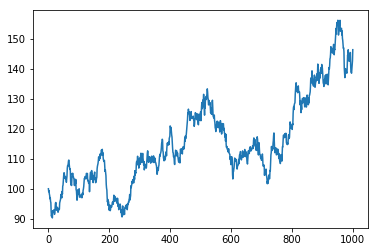

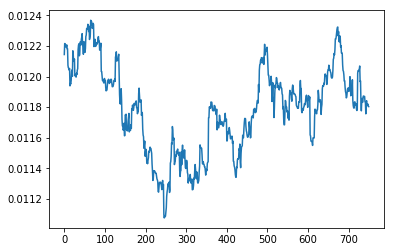

In [1248]:
AAA=list(np.random.normal(r,sigma,1000))
BBB=[100 for i in range(len(AAA)+1)]
for n,i in enumerate(AAA):
    BBB[n+1]=BBB[n]*(1+i)
plt.plot(BBB)
plt.show()
plt.plot([np.std(AAA[i:250+i]) for i in range(1000-250)])
plt.show()

#### With d same for both type of investors, the structure is less significant

In [221]:
(1+r)**1500

1.3870127014822193

248 17


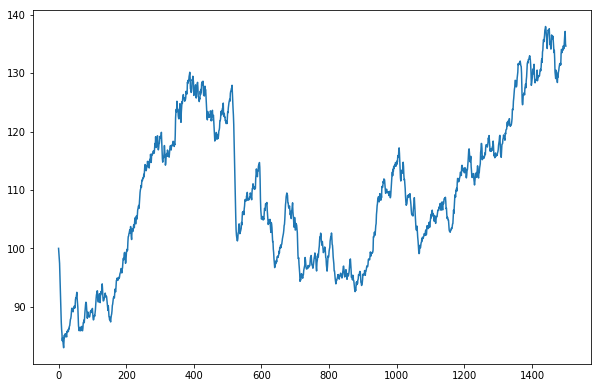

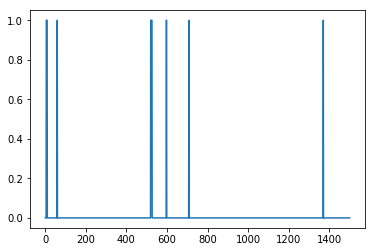

248


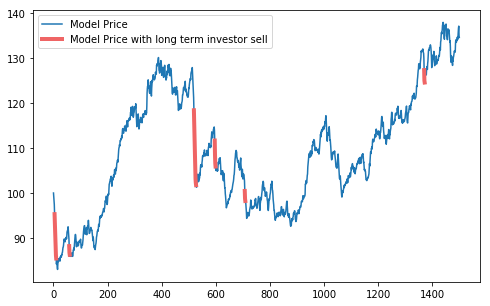

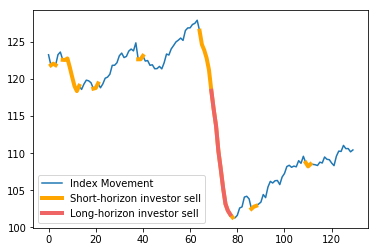

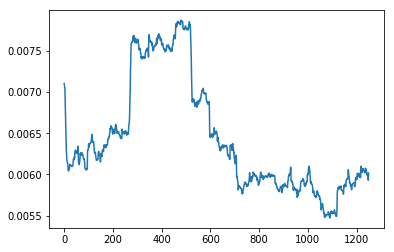

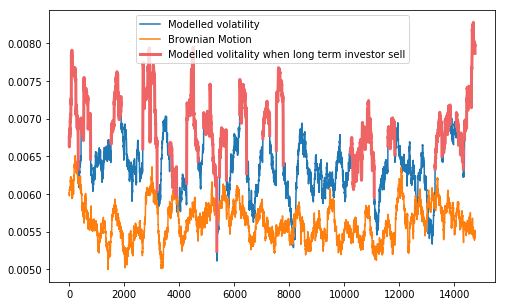

In [10]:


## r=0.05/250
# sigma=0.05/250




def new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def h_l(x,R_t2,t_l):
        if x>t_l:
            return 0,-a_l*x
        else:
            return 1,-d

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.12*sigma
        t_l = np.mean(R_t[-10:])-1.12*sigma2
        long,h_long=h_l(x,R_t2,t_l)
        short,h_short=h_s(x,R_t2,t_s)
        
        #print(t_s,short,t_l,long,x)
        
        change=np.random.normal(r,sigma)+h_long+h_short+M(x)
        
        long_list[i]=long
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],long_list,short_list



np.random.seed(110
              )

tenday_return=(np.log(DJ_daily.loc[10:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-10].values))

r=np.mean(daily_return)
sigma=np.std(daily_return)/2
r2=np.mean(tenday_return)
sigma2=np.std(tenday_return)/2


a_s=0.4
a_l=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=1500
d=0.010
price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days)
plt.figure(figsize=(10,6.5))
index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)
plt.plot(index)
print(sum(short_list),sum(long_list))
plt.show()
long_list=[0]+long_list+[0]
short_list=[0]+short_list+[0]
plt.plot(long_list)
plt.show()







new_list=[np.nan for i in index]
new_short_list=[np.nan for i in index]
plt.figure(figsize=(8,5))
for n,i in enumerate(index):
    if long_list[n]==1 or long_list[n-1]==1 or long_list[n+1]==1:
        new_list[n]=i
    if short_list[n]==1 or short_list[n-1]==1 or short_list[n+1]==1:
        new_short_list[n]=i
print(sum(short_list))
plt.plot(index)
plt.plot(new_list,color='#ef6565',lw=4)
plt.legend(['Model Price','Model Price with long term investor sell'])
plt.show()

plt.plot(index[450:580])
plt.plot(new_short_list[450:580],color='orange',lw=4)
plt.plot(new_list[450:580],color='#ef6565',lw=4)
plt.legend(['Index Movement','Short-horizon investor sell','Long-horizon investor sell'])
plt.show()


volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]
plt.plot(volatility1)
plt.show()

days=15000
d=0.0102
price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)

volatility_fullmodel=[np.std(price_change[i:250+i]) for i in range(days-250)]


new_list2=[np.nan for i in volatility_fullmodel]
for n,i in enumerate(volatility_fullmodel):
    if np.sum(long_list[n:n+250])!=0:
        new_list2[n]=i

refered_list=list(np.random.normal(r,sigma,15000))
plt.figure(figsize=(8,5))
plt.plot(volatility_fullmodel)
plt.plot([np.std(refered_list[i:250+i]) for i in range(days-250)])
plt.plot(new_list2,color='#ef6565',lw=3)
plt.legend(['Modelled volatility','Brownian Motion','Modelled volitality when long term investor sell'])

plt.show()

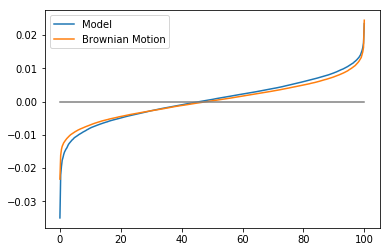

In [11]:
Z,Y=[],[]
X=[]
bw_r=list(np.random.normal(r,sigma,len(price_change)))

for i in range(401):
    Z.append(np.percentile(bw_r,i/4))
    Y.append(np.percentile(price_change,i/4))
    X.append(i/4)
plt.plot(X,Y,label='Model')
plt.plot(X,Z,label='Brownian Motion')
plt.plot(X,[0 for i in X],color='grey')
plt.legend()

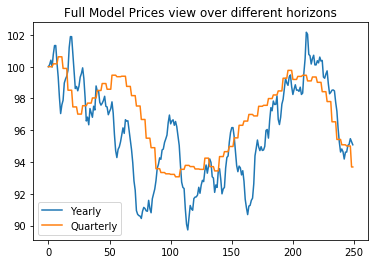

In [12]:
start=1170

Quarterly=index[(start+50):(start+50+63)]
Yearly=index[start:start+250]

Yearly=[i/Yearly[0]*100 for i in Yearly]
Quarterly=[Quarterly[i//4]/Quarterly[0]*100 for i in range(len(Yearly))]
plt.plot(Yearly)
plt.plot(Quarterly)
plt.title('Full Model Prices view over different horizons')
plt.legend(['Yearly','Quarterly'])

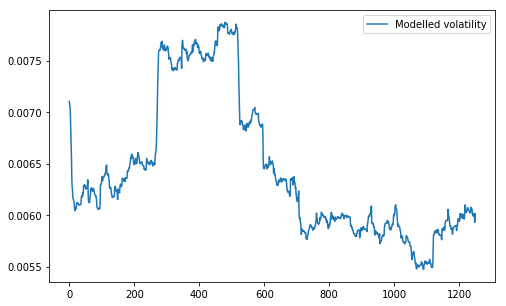

In [13]:
plt.figure(figsize=(8,5))
plt.plot(volatility1)

plt.legend(['Modelled volatility','Brownian Motion','Modelled volitality when long term investor sell'])

plt.show()

## Now test restricted model

332


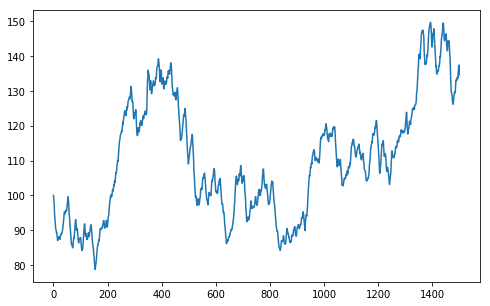

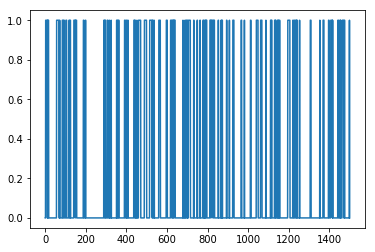

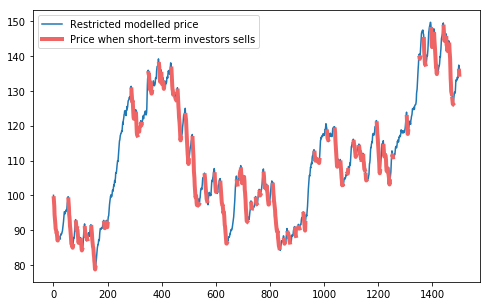

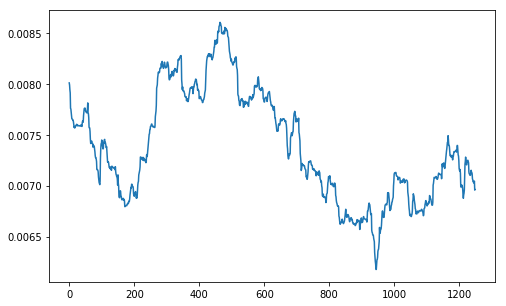

In [14]:





## r=0.05/250
# sigma=0.05/250




def new_price(R_t,r,sigma,a_s,a_l,a_m,d,days):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.12*sigma

        short,h_short=h_s(x,R_t2,t_s)
        
        #print(t_s,short,t_l,long,x)
        
        change=np.random.normal(r,sigma)+h_short+M(x)
        
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],short_list



np.random.seed(110)

r=np.mean(daily_return)
sigma=np.std(daily_return)/2



a_s=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=1500
d=0.0094
price_change,short_list=new_price(R_t,r,sigma,a_s,a_l,a_m,d,days)
plt.figure(figsize=(8,5))
index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)
plt.plot(index)
print(sum(short_list))
plt.show()
short_list=[0]+short_list+[0]
plt.plot(short_list)
plt.show()


plt.figure(figsize=(8,5))

new_list=[np.nan for i in index]
for n,i in enumerate(index):
    if short_list[n]==1 or short_list[n-1]==1 or short_list[n+1]==1:
        new_list[n]=i
plt.plot(index,label='Restricted modelled price')
plt.plot(new_list,color='#ef6565',lw=4,label='Price when short-term investors sells')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]
plt.plot(volatility1)
plt.show()




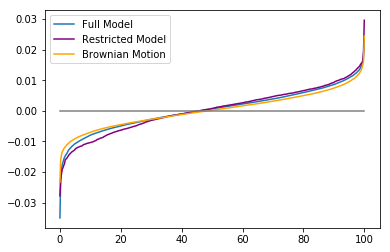

In [15]:
X=[]
restricted=[]
for i in range(401):
    restricted.append(np.percentile(price_change,i/4))
    X.append(i/4)
plt.plot(X,Y,label='Full Model')
plt.plot(X,restricted,label='Restricted Model',color='purple')
plt.plot(X,Z,label='Brownian Motion',color='orange')
plt.plot(X,[0 for i in X],color='grey')
plt.legend()

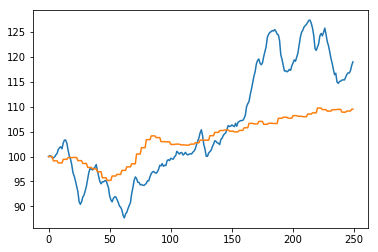

In [16]:
start=1180

Quarterly=index[(start+50):(start+50+63)]
Yearly=index[start:start+250]

Yearly=[i/Yearly[0]*100 for i in Yearly]
Quarterly=[Quarterly[i//4]/Quarterly[0]*100 for i in range(len(Yearly))]
plt.plot(Yearly)
plt.plot(Quarterly)



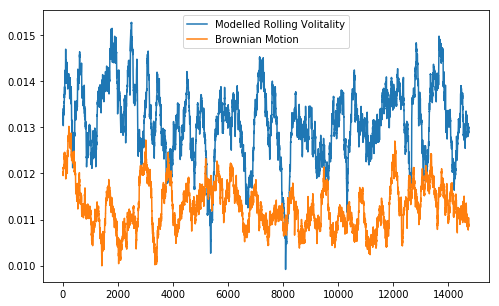

In [236]:
days=15000
d=0.0102
price_change,short_list=new_price(R_t,r,sigma,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)

volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]


plt.figure(figsize=(8,5))
refered_list=list(np.random.normal(r,sigma,15000))
plt.plot(volatility1)
plt.plot([np.std(refered_list[i:250+i]) for i in range(days-250)])
plt.legend(['Modelled Rolling Volitality','Brownian Motion'])
plt.show()

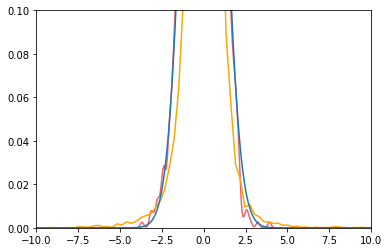

In [17]:
sns.kdeplot(price_change/np.std(price_change), shade=False, bw=.1,color="#ef6565")
sns.kdeplot(daily_return/np.std(daily_return), shade=False, bw=.1,color="orange")
x=np.linspace(-10,10,1000)
plt.plot(x, stats.norm.pdf(x, 0, 1))
plt.xlim((-10,10))
plt.ylim((0,0.1))
plt.show()

### Modified Model

410 36


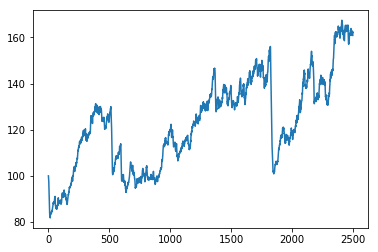

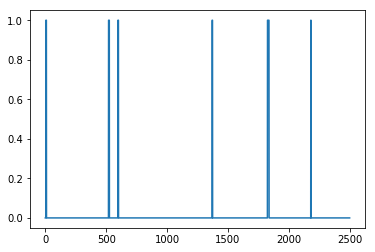

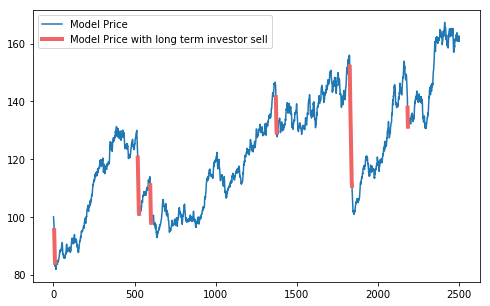

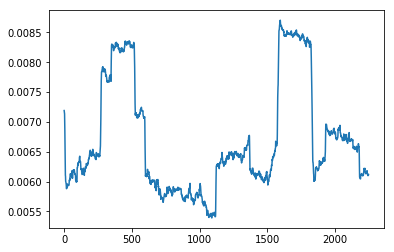

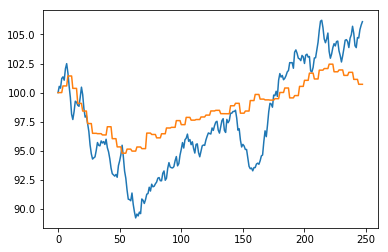

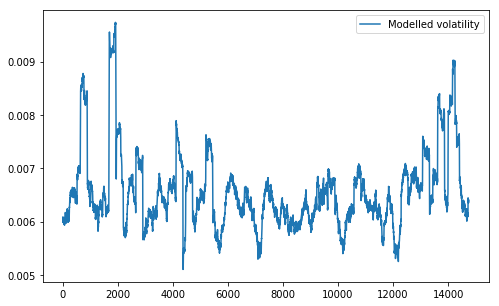

In [247]:





## r=0.05/250
# sigma=0.05/250




def new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def h_l(x,R_t2,t_l):
        if x>t_l:
            return 0,-a_l*x
        else:
            return 1,-d*1.5

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.12*sigma
        t_l = np.mean(R_t[-10:])-1.12*sigma2
        long,h_long=h_l(x,R_t2,t_l)
        short,h_short=h_s(x,R_t2,t_s)
        
        #print(t_s,short,t_l,long,x)
        
        change=np.random.normal(r,sigma)+h_long+h_short+M(x)
        
        long_list[i]=long
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],long_list,short_list



np.random.seed(110
              )

tenday_return=(np.log(DJ_daily.loc[10:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-10].values))

r=np.mean(daily_return)
sigma=np.std(daily_return)/2
r2=np.mean(tenday_return)
sigma2=np.std(tenday_return)/2


a_s=0.4
a_l=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=2500
d=0.0095
price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)
plt.plot(index)
print(sum(short_list),sum(long_list))
plt.show()
long_list=[0]+long_list+[0]
plt.plot(long_list)
plt.show()

new_list=[np.nan for i in index]
for n,i in enumerate(index):
    if long_list[n]==1 or long_list[n-1]==1 or long_list[n+1]==1:
        new_list[n]=i
plt.figure(figsize=(8,5))
plt.plot(index)
plt.plot(new_list,color='#ef6565',lw=4)
plt.legend(['Model Price','Model Price with long term investor sell'])
plt.show()


volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]
plt.plot(volatility1)
plt.show()

Yearly=index[1000:1248]
Quarterly=index[1050:1112]
Yearly=[i/Yearly[0]*100 for i in Yearly]
Quarterly=[Quarterly[i//4]/Quarterly[0]*100 for i in range(len(Yearly))]
plt.plot(Yearly)
plt.plot(Quarterly)


days=15000
#d=0.0102
price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)

volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]


new_list2=[np.nan for i in volatility1]
for n,i in enumerate(volatility1):
    if np.sum(long_list[n:n+250])!=0:
        new_list2[n]=i

refered_list=list(np.random.normal(r,sigma,15000))
plt.figure(figsize=(8,5))
plt.plot(volatility1)
#plt.plot([np.std(refered_list[i:250+i]) for i in range(days-250)])

#plt.plot(new_list2,color='#ef6565',lw=3)
plt.legend(['Modelled volatility','Brownian Motion','Modelled volitality when long term investor sell'])
plt.show()

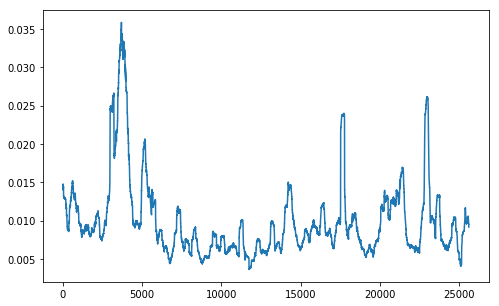

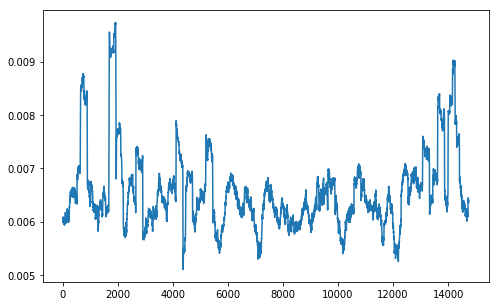

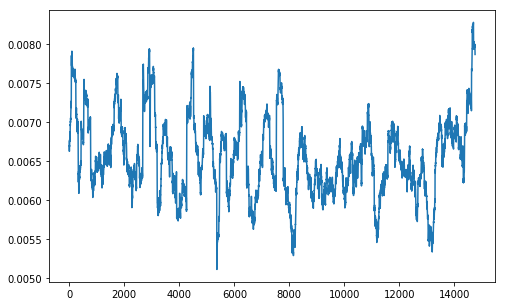

In [226]:
a=[]
for i in range(len(daily_return)-250):
    a.append(np.std(daily_return[i:i+250]))
plt.figure(figsize=(8,5))
plt.plot(a)
plt.show()
plt.figure(figsize=(8,5))
plt.plot(volatility1[:len(a)])
plt.show()
plt.figure(figsize=(8,5))
plt.plot(volatility_fullmodel[:len(a)])
plt.show()

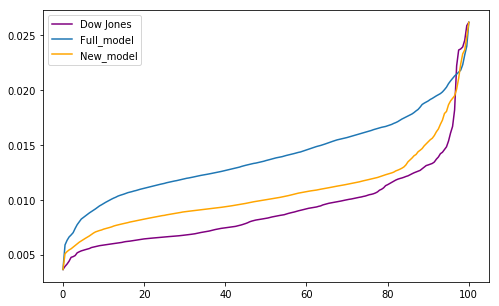

In [246]:
X=[]
DJ_Percentile=[]
Full_model_percentile=[]
new_model_percentile=[]
for i in range(201):
    DJ_Percentile.append(np.percentile(a[-days:],i/2))
    Full_model_percentile.append(np.percentile(volatility_fullmodel,i/2))
    new_model_percentile.append(np.percentile(volatility1,i/2))
    X.append(i/2)
    
range1=max(DJ_Percentile)-min(DJ_Percentile)
range2=max(volatility_fullmodel)-min(volatility_fullmodel)
range3=max(volatility1)-min(volatility1)

scaled_full=np.array(Full_model_percentile)*(range1/range2)
scaled_full=scaled_full+(DJ_Percentile[0]-scaled_full[0])

scaled_new=np.array(new_model_percentile)*(range1/range3)
scaled_new=scaled_new+(DJ_Percentile[0]-scaled_new[0])



plt.figure(figsize=(8,5))
plt.plot(X,DJ_Percentile,label='Dow Jones',color='purple')
plt.plot(X,scaled_full,label='Full_model')
plt.plot(X,scaled_new,label='New_model',color='orange')
plt.legend()

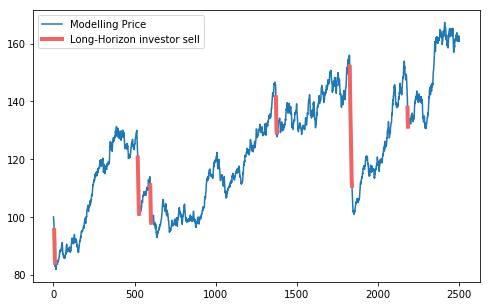

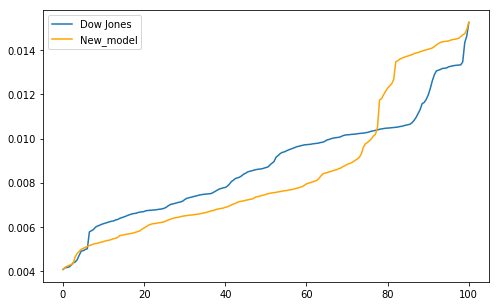

(11.656908577964856, 6.834053487791461e-06)

In [371]:
def new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days,factor):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def h_l(x,R_t2,t_l):
        if x>t_l:
            return 0,-a_l*x
        else:
            return 1,-d*factor

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.12*sigma
        t_l = np.mean(R_t[-10:])-1.12*sigma2
        long,h_long=h_l(x,R_t2,t_l)
        short,h_short=h_s(x,R_t2,t_s)

        #print(t_s,short,t_l,long,x)

        change=np.random.normal(r,sigma)+h_long+h_short+M(x)

        long_list[i]=long
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],long_list,short_list




## r=0.05/250
# sigma=0.05/250
np.random.seed(110)
tenday_return=(np.log(DJ_daily.loc[10:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-10].values))
a=[]
for i in range(len(daily_return)-250):
    a.append(np.std(daily_return[i:i+250]))


def test_parameter(d,factor,days,r,end_price,sigma,r2,sigma2,if_plot=True):



    a_s=0.4
    a_l=0.4
    a_m=1
    R_t=list(np.random.normal(r,sigma,10))

    price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days,factor)

    index=[100 for i in range(len(price_change)+1)]
    for n,i in enumerate(price_change):
        index[n+1]=index[n]*(1+i)
    
    
    if if_plot==True:
        long_list=[0]+long_list+[0]
        new_list=[np.nan for i in index]
        for n,i in enumerate(index):
            if long_list[n]==1 or long_list[n-1]==1 or long_list[n+1]==1:
                new_list[n]=i

        plt.figure(figsize=(8,5))
        plt.plot(index,label='Modelling Price')
        plt.plot(new_list,color='#ef6565',lw=4,label='Long-Horizon investor sell')
        plt.legend()
        plt.show()


    volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]


    
    X=[]
    DJ_Percentile=[]
    new_model_percentile=[]
    for i in range(201):
        DJ_Percentile.append(np.percentile(a[-days:],i/2))
        new_model_percentile.append(np.percentile(volatility1,i/2))
        X.append(i/2)
    if if_plot==True:
        plt.figure(figsize=(8,5))
        range1=max(DJ_Percentile)-min(DJ_Percentile)
        range2=max(new_model_percentile)-min(new_model_percentile)
        scaled_new=np.array(new_model_percentile)*(range1/range2)
        scaled_new=scaled_new+(DJ_Percentile[0]-scaled_new[0])
        #+(DJ_Percentile[0]-new_model_percentile[0])
        plt.plot(X,DJ_Percentile,label='Dow Jones')
        plt.plot(X,scaled_new,label='New_model',color='orange')
        plt.legend()
        plt.show()
    mean_error=abs(end_price-index[-1])
    volitaility_error=np.square(np.subtract(DJ_Percentile,new_model_percentile)).mean()
    #print('error in return ratio: {}'.format(mean_error))
    #print('error in return ratio: {}'.format(volitaility_error))
    return mean_error,volitaility_error


d=0.0095
factor=1.5
days=2500
r=np.mean(daily_return)
end_price=100*(1+r)**days
sigma=np.std(daily_return)/2
r2=np.mean(tenday_return)
sigma2=np.std(tenday_return)/2

test_parameter(d,factor,days,r,end_price,sigma,r2,sigma2)

In [121]:
(list(DJ_daily.Last)[-1]/list(DJ_daily.Last)[0])**(1/len(daily_return)),np.mean(daily_return)

(1.000218149109467, 0.00021812531841002524)

In [308]:
saved_mean=np.zeros((21,21))
saved_voli=np.zeros((21,21))

for n1,d in enumerate([0.009+0.0001*i for i in range(21)]):
    for n2,factor in enumerate([1.3+i*0.02 for i in range(21)]):
        print('\r current is {},{}'.format(n1,n2),end="")
        np.random.seed(110)
        saved_mean[n1,n2],saved_voli[n1,n2]=test_parameter(d,factor,days,r,end_price,sigma,r2,sigma2,if_plot=False)


 current is 20,20

In [307]:
np.arange(0,25,5),

(array([ 0,  5, 10, 15, 20]), (20, 20))

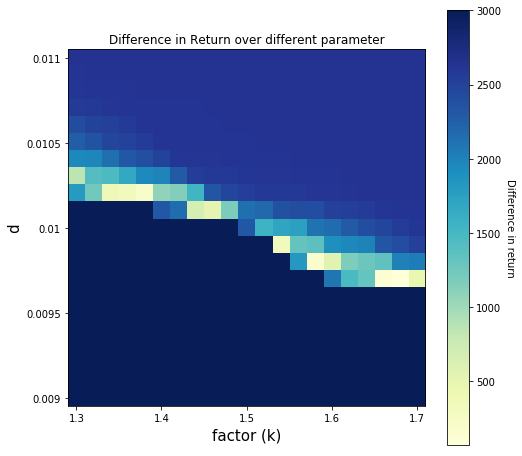

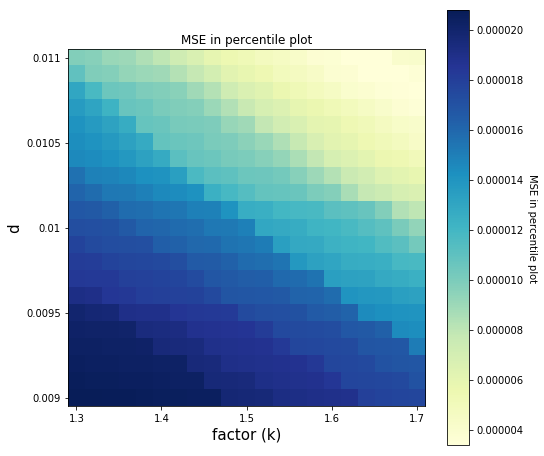

In [337]:

# plt.figure(figsize=(10,10))
# plt.imshow(saved_mean,cmap=cm,vmin=0)
# plt.colorbar()
# plt.show()
# plt.figure(figsize=(10,10))
# plt.imshow(saved_voli,cmap=cm)
# plt.colorbar()
# plt.show()


fig, ax = plt.subplots(figsize=(8,8))

cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
im = ax.imshow(saved_mean,cmap='YlGnBu',origin='lower', interpolation='nearest',vmax=3000)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Difference in return',rotation=-90, va="bottom")
# We want to show all ticks...
ax.set_xticks(np.arange(0,25,5))
ax.set_yticks(np.arange(0,25,5))
# ... and label them with the respective list entries.
ax.set_xticklabels([np.round(1.3+i*0.02*5,2) for i in range(5)])
ax.set_yticklabels([np.round(0.009+0.0001*i*5,4) for i in range(5)])

plt.title('Difference in Return over different parameter')
plt.xlabel('factor (k)', fontsize=15)
plt.ylabel('d', fontsize=15)
plt.show()


fig, ax = plt.subplots(figsize=(8,8))

im = ax.imshow(saved_voli,cmap='YlGnBu',origin='lower', interpolation='nearest')
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('MSE in percentile plot',rotation=-90, va="bottom")
# We want to show all ticks...
ax.set_xticks(np.arange(0,25,5))
ax.set_yticks(np.arange(0,25,5))
# ... and label them with the respective list entries.
ax.set_xticklabels([np.round(1.3+i*0.02*5,2) for i in range(5)])
ax.set_yticklabels([np.round(0.009+0.0001*i*5,4) for i in range(5)])

plt.title('MSE in percentile plot')
plt.xlabel('factor (k)', fontsize=15)
plt.ylabel('d', fontsize=15)
plt.show()

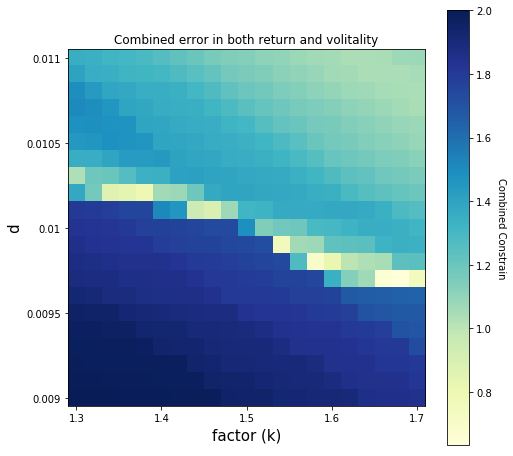

In [370]:
mean_matrix=saved_mean.clip(0,3000)
mean_matrix=mean_matrix/mean_matrix.max()
volitility_matrix=saved_voli/saved_voli.max()
fig, ax = plt.subplots(figsize=(8,8))
colors = ['#71b6de','#ffffff','#3eb5b3']  # R -> G -> B
n_bin = 100  # Discretizes the interpolation into bins
cmap_name='111'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
im = ax.imshow(volitility_matrix+mean_matrix,cmap='YlGnBu',origin='lower', interpolation='nearest')
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Combined Constrain',rotation=-90, va="bottom")
# We want to show all ticks...
ax.set_xticks(np.arange(0,25,5))
ax.set_yticks(np.arange(0,25,5))
# ... and label them with the respective list entries.
ax.set_xticklabels([np.round(1.3+i*0.02*5,2) for i in range(5)])
ax.set_yticklabels([np.round(0.009+0.0001*i*5,4) for i in range(5)])

plt.title('Combined error in both return and volitality')
plt.xlabel('factor (k)', fontsize=15)
plt.ylabel('d', fontsize=15)
plt.show()

26.351441730535733


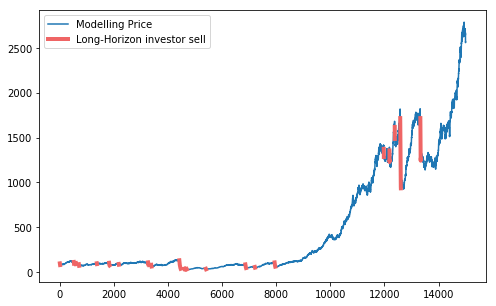

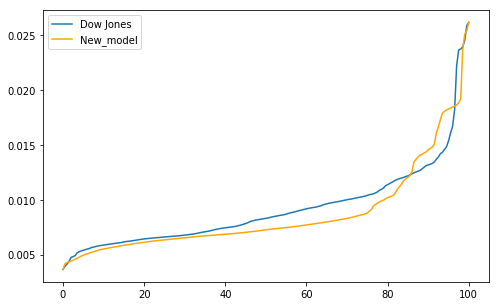

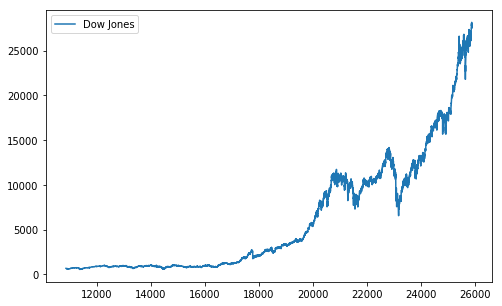

In [373]:
np.random.seed(110)

days=15000
r=np.mean(daily_return)
end_price=100*(1+r)**days
sigma=np.std(daily_return)/2
r2=np.mean(tenday_return)
sigma2=np.std(tenday_return)/2
print((1+r)**days)


d=0.0097
factor=1.68
test_parameter(d,factor,days,r,end_price,sigma,r2,sigma2)
plt.figure(figsize=(8,5))

plt.plot(DJ_daily.iloc[-15000:,1])
plt.legend(['Dow Jones'])
plt.show()

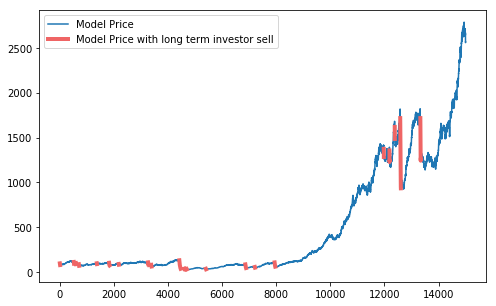

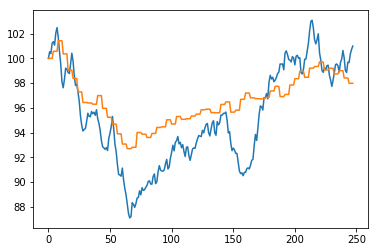

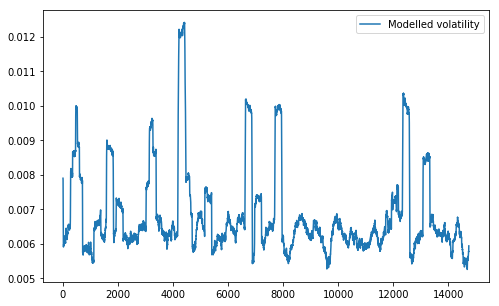

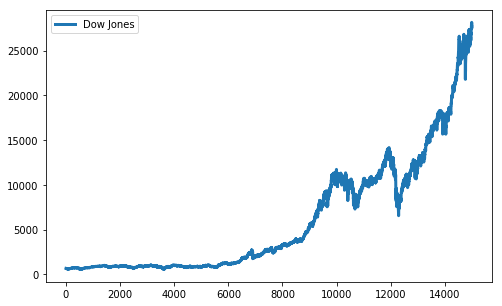

In [387]:





## r=0.05/250
# sigma=0.05/250




def new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def h_l(x,R_t2,t_l):
        if x>t_l:
            return 0,-a_l*x
        else:
            return 1,-d*factor

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.12*sigma
        t_l = np.mean(R_t[-10:])-1.12*sigma2
        long,h_long=h_l(x,R_t2,t_l)
        short,h_short=h_s(x,R_t2,t_s)
        
        #print(t_s,short,t_l,long,x)
        
        change=np.random.normal(r,sigma)+h_long+h_short+M(x)
        
        long_list[i]=long
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],long_list,short_list



np.random.seed(110)

tenday_return=(np.log(DJ_daily.loc[10:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-10].values))

r=np.mean(daily_return)
sigma=np.std(daily_return)/2
r2=np.mean(tenday_return)
sigma2=np.std(tenday_return)/2


a_s=0.4
a_l=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=15000
d=0.0097
factor=1.68
price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)

long_list=[0]+long_list+[0]


new_list=[np.nan for i in index]
for n,i in enumerate(index):
    if long_list[n]==1 or long_list[n-1]==1 or long_list[n+1]==1:
        new_list[n]=i
plt.figure(figsize=(8,5))
plt.plot(index)
plt.plot(new_list,color='#ef6565',lw=4)
plt.legend(['Model Price','Model Price with long term investor sell'])
plt.show()


volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]


Yearly=index[1000:1248]
Quarterly=index[1050:1112]
Yearly=[i/Yearly[0]*100 for i in Yearly]
Quarterly=[Quarterly[i//4]/Quarterly[0]*100 for i in range(len(Yearly))]
plt.plot(Yearly)
plt.plot(Quarterly)


new_list2=[np.nan for i in volatility1]
for n,i in enumerate(volatility1):
    if np.sum(long_list[n:n+250])!=0:
        new_list2[n]=i

refered_list=list(np.random.normal(r,sigma,15000))
plt.figure(figsize=(8,5))
plt.plot(volatility1)
#plt.plot([np.std(refered_list[i:250+i]) for i in range(days-250)])

#plt.plot(new_list2,color='#ef6565',lw=3)
plt.legend(['Modelled volatility','Brownian Motion','Modelled volitality when long term investor sell'])
plt.show()
plt.figure(figsize=(8,5))
plt.plot(DJ_daily.iloc[-15000:,1].values,lw=3)
plt.legend(['Dow Jones'])
plt.show()

new_model_volatility=volatility1.copy()
new_model_return=price_change.copy()

In [388]:
## calculate volitility of original model

np.random.seed(110)

tenday_return=(np.log(DJ_daily.loc[10:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-10].values))

r=np.mean(daily_return)
sigma=np.std(daily_return)/2
r2=np.mean(tenday_return)
sigma2=np.std(tenday_return)/2


a_s=0.4
a_l=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=15000

d=0.0102
factor=1
price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)

long_list=[0]+long_list+[0]


new_list=[np.nan for i in index]
for n,i in enumerate(index):
    if long_list[n]==1 or long_list[n-1]==1 or long_list[n+1]==1:
        new_list[n]=i

        


volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]

Original_model_volitility=volatility1.copy()
original_return=price_change.copy()


In [389]:
## calculate volatility of restricted model




## r=0.05/250
# sigma=0.05/250




def new_price(R_t,r,sigma,a_s,a_l,a_m,d,days):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.12*sigma

        short,h_short=h_s(x,R_t2,t_s)
        
        #print(t_s,short,t_l,long,x)
        
        change=np.random.normal(r,sigma)+h_short+M(x)
        
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],short_list



np.random.seed(110)

r=np.mean(daily_return)
sigma=np.std(daily_return)/2



a_s=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=15000
d=0.0094
price_change,short_list=new_price(R_t,r,sigma,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)
short_list=[0]+short_list+[0]
new_list=[np.nan for i in index]
for n,i in enumerate(index):
    if short_list[n]==1 or short_list[n-1]==1 or short_list[n+1]==1:
        new_list[n]=i
restricted_model_volitility=[np.std(price_change[i:250+i]) for i in range(days-250)]
restricted_return=price_change.copy()




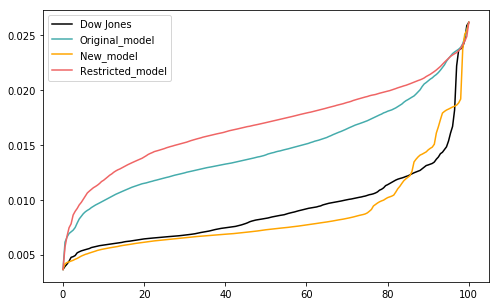

In [385]:
X=[]
DJ_Percentile=[]
Original_model_percentile=[]
restricted_model_percentile=[]
new_model_percentile=[]
for i in range(201):
    DJ_Percentile.append(np.percentile(a[-days:],i/2))
    Original_model_percentile.append(np.percentile(Original_model_volitility,i/2))
    new_model_percentile.append(np.percentile(new_model_volatility,i/2))
    restricted_model_percentile.append(np.percentile(restricted_model_volitility,i/2))
    X.append(i/2)
    
range1=max(DJ_Percentile)-min(DJ_Percentile)
range2=max(Original_model_percentile)-min(Original_model_percentile)
range3=max(new_model_percentile)-min(new_model_percentile)
range4=max(restricted_model_percentile)-min(restricted_model_percentile)


scaled_original=np.array(Original_model_percentile)*(range1/range2)
scaled_original=scaled_original+(DJ_Percentile[0]-scaled_original[0])

scaled_new=np.array(new_model_percentile)*(range1/range3)
scaled_new=scaled_new+(DJ_Percentile[0]-scaled_new[0])

scaled_restricted=np.array(restricted_model_percentile)*(range1/range4)
scaled_restricted=scaled_restricted+(DJ_Percentile[0]-scaled_restricted[0])

plt.figure(figsize=(8,5))
plt.plot(X,DJ_Percentile,label='Dow Jones',color='black')
plt.plot(X,scaled_original,label='Original_model',color='#45acac')
plt.plot(X,scaled_new,label='New_model',color='orange')
plt.plot(X,scaled_restricted,label='Restricted_model',color='#ef6565')
plt.legend()

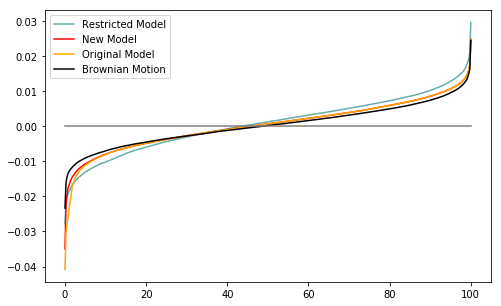

In [398]:
X=[]
restricted_return_list=[]
new_return_list=[]
original_return_list=[]

for i in range(401):
    restricted_return_list.append(np.percentile(restricted_return,i/4))
    new_return_list.append(np.percentile(original_return,i/4))
    original_return_list.append(np.percentile(new_model_return,i/4))

    X.append(i/4)
plt.figure(figsize=(8,5))
plt.plot(X,restricted_return_list,label='Restricted Model',color='#65acac')
plt.plot(X,new_return_list,label='New Model',color='r')
plt.plot(X,original_return_list,label='Original Model',color='orange')
plt.plot(X,Z,label='Brownian Motion',color='black')

plt.plot(X,[0 for i in X],color='grey')
plt.legend()

## section 4    H measure

In [291]:
r=np.mean(daily_return)
(1+r)**2500

1.7250461976199225


0.7265857717009043


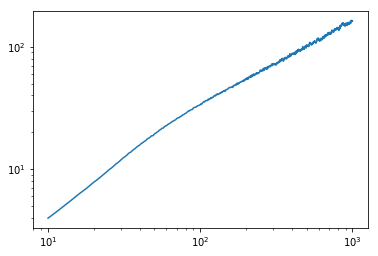

In [400]:
def RS_value(N_return,n):
    N=len(N_return)
    A=N//n
    N_return=N_return[:A*n]
    list_of_sublist = np.split(N_return,A)
    mean_of_sublist = np.mean(list_of_sublist,axis=1)
    list_of_sublist = list_of_sublist - mean_of_sublist[:, None]
    cumu_of_sublist = np.cumsum(list_of_sublist,axis=1)
    RS_value = np.mean((np.max(cumu_of_sublist,axis=1)-np.min(cumu_of_sublist,axis=1))/np.std(list_of_sublist,axis=1))
    return RS_value

def hurst_score(lag,time_seires,if_plot=True):
    N_return=(np.log(time_seires.iloc[lag:,-1].values)-np.log(time_seires.iloc[:,-1][:-lag].values))
    list_RS=[]
    list_n=[]
    #for n in range(10,len(N_return)//2+1):
    for n in range(10,1000):
        list_RS.append(RS_value(N_return,n))
        list_n.append(n)
        #print('\r' +'current is: {}'.format(n),end='')
    if if_plot==True:
        plt.loglog(list_n,list_RS)
    return np.polyfit(np.log(list_n),np.log(list_RS),1)[0]
    
lag=20
print('')
print(hurst_score(lag,DJ_daily))


### Now try with different lag

In [408]:
list_of_dates = DJ_daily.Date.values
def hurst_matrix(lag):
    saved_hurst=np.zeros((21,21))
    for n1,start in enumerate([i for i in range(0,20001,1000)]):
        for n2,end in enumerate([i for i in range(5000,25001,1000)]):
            if n2>=n1:
                this_time_seires=DJ_daily.iloc[start:end,[1]]
                saved_hurst[n2,n1]=hurst_score(lag,this_time_seires,if_plot=False)
                #saved_hurst[n2,n1]=n2
                print('\r' +'current is: {0},{1}'.format(n1,n2),end='')
                print('\r',end='')
            else:
                saved_hurst[n2,n1]=np.nan
    return saved_hurst

def plot_hurst(saved_hurst,lag):
    colors = ['#71b6de','#ffffff','#3eb5b3']  # R -> G -> B
    n_bin = 100  # Discretizes the interpolation into bins
    cmap_name='111'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
    #origin='lower', 

    fig, ax = plt.subplots(figsize=(10,10))

    im = ax.imshow(saved_hurst,cmap=cm,origin='lower', interpolation='nearest')

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Hurst score',rotation=-90, va="bottom")
    # We want to show all ticks...
    ax.set_xticks(np.arange(0,25,5))
    ax.set_yticks(np.arange(0,25,5))
    # ... and label them with the respective list entries.
    ax.set_xticklabels([str(list_of_dates[i*5*1000])[:10] for i in range(5)])
    ax.set_yticklabels([str(list_of_dates[i*5*1000+5000])[:10] for i in range(5)])

    plt.title('Hurst Exponent with lag={}'.format(lag),fontsize=20)
    plt.xlabel('Starting Date', fontsize=15)
    plt.ylabel('Ending Date', fontsize=15)
    plt.show()
    return None


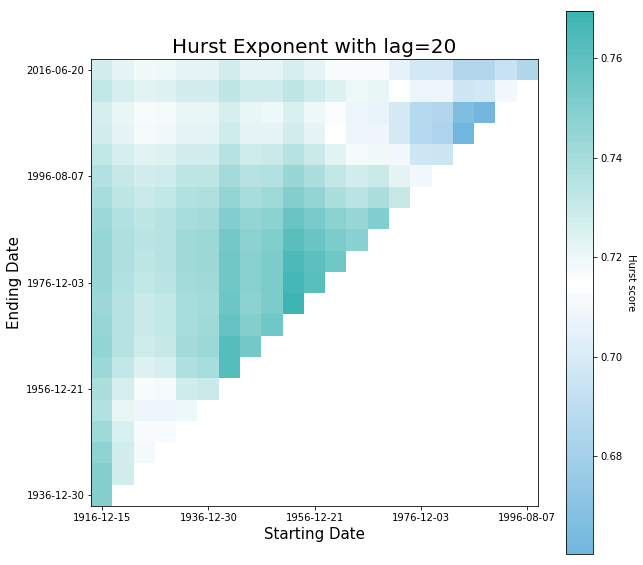

In [2659]:
lag=20
saved_hurst=hurst_matrix(lag=lag)
plot_hurst(saved_hurst,lag=lag)

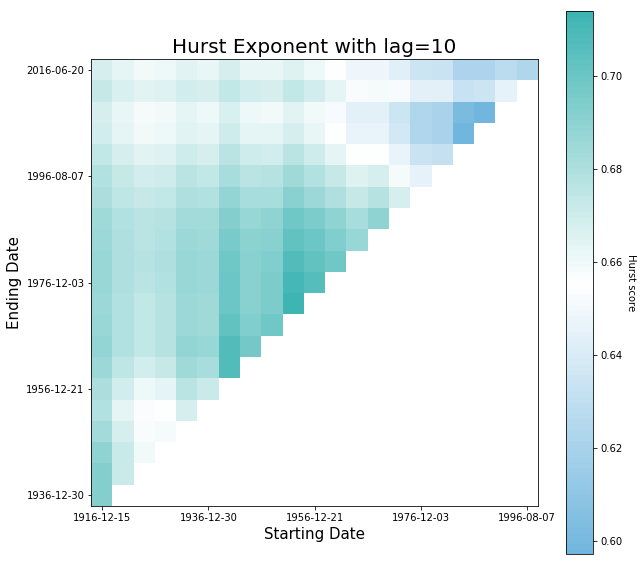

In [2662]:
lag=10
saved_hurst=hurst_matrix(lag=lag)
plot_hurst(saved_hurst,lag=lag)

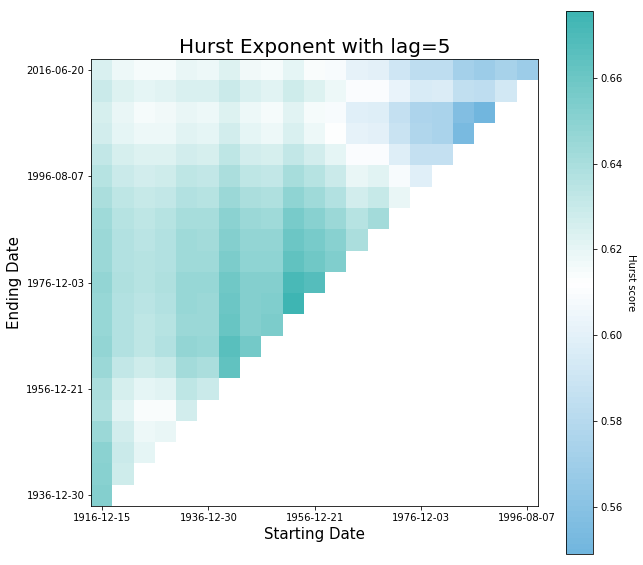

In [2664]:
lag=5
saved_hurst=hurst_matrix(lag=lag)
plot_hurst(saved_hurst,lag=lag)

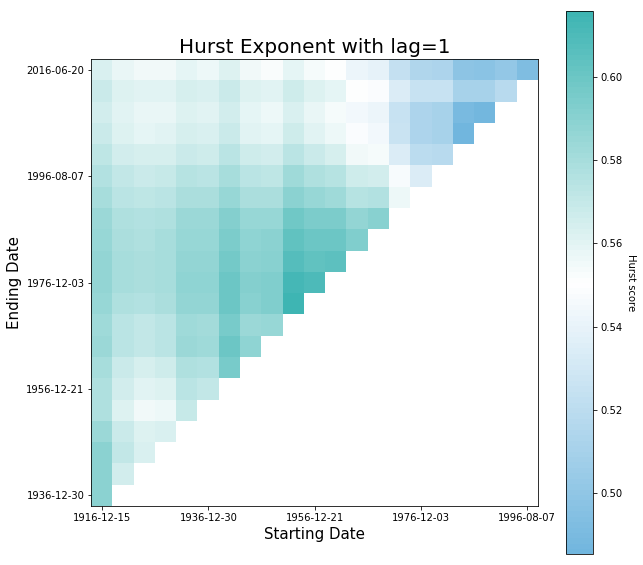

In [2665]:
lag=1
saved_hurst=hurst_matrix(lag=lag)
plot_hurst(saved_hurst,lag=lag)

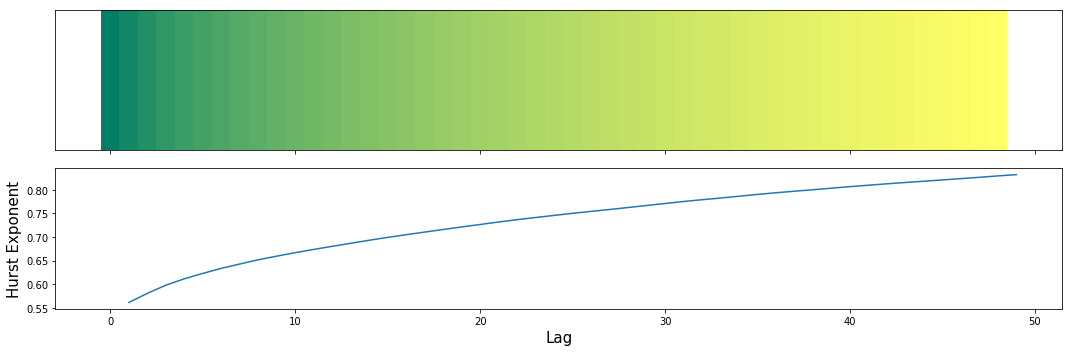

In [2681]:
# result_value=[]
# x=[i for i in range(1,50)]
# for lag in range(1,50):
#     result_value.append(hurst_score(lag,DJ_daily),if_plot=False)


plt.rcParams["figure.figsize"] = 15,5

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)

#extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax.imshow(np.array(result_value)[None,:], cmap="summer", aspect="auto")
ax.set_yticks([])
#ax.set_xlim(extent[0], extent[1])

ax2.plot(x,result_value)
ax2.xaxis.set_label_text('Lag')
ax2.xaxis.label.set_size(15)
ax2.yaxis.set_label_text('Hurst Exponent')
ax2.yaxis.label.set_size(15)
plt.tight_layout()
plt.show()


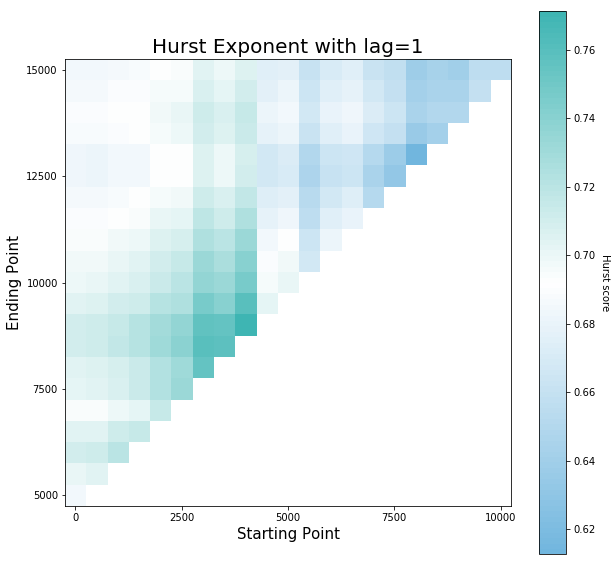

In [445]:
saved_hurst=np.zeros((21,21))
lag=1
new_model_index=[100 for i in range(len(new_model_return)+1)]
for n,i in enumerate(new_model_return):
    new_model_index[n+1]=new_model_index[n]*(1+i)

new_model_index=np.array(new_model_index)
nlag_return=np.log(new_model_index[lag:])-np.log(new_model_index[:-lag])
for n1,start in enumerate([i for i in range(0,10001,500)]):
    for n2,end in enumerate([i for i in range(5000,15001,500)]):
        if n2>=n1:
            list_RS=[]
            list_n=[]
            #for n in range(10,len(N_return)//2+1):
            for n in range(10,1000):
                N_return=nlag_return[start:end]
                list_RS.append(RS_value(N_return,n))
                list_n.append(n)
            saved_hurst[n2,n1]=np.polyfit(np.log(list_n),np.log(list_RS),1)[0]
            print('\r' +'current is: {0},{1}'.format(n1,n2),end='')
            print('\r',end='')
        else:
            saved_hurst[n2,n1]=np.nan
colors = ['#71b6de','#ffffff','#3eb5b3']  # R -> G -> B
n_bin = 100  # Discretizes the interpolation into bins
cmap_name='111'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
#origin='lower', 

fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(saved_hurst,cmap=cm,origin='lower', interpolation='nearest')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Hurst score',rotation=-90, va="bottom")
# We want to show all ticks...
ax.set_xticks(np.arange(0,21,5))
ax.set_yticks(np.arange(0,21,5))
# ... and label them with the respective list entries.
ax.set_xticklabels([2500*i for i in range(5)])
ax.set_yticklabels([2500*i+5000 for i in range(5)])

plt.title('Hurst Exponent with lag={}'.format(lag),fontsize=20)
plt.xlabel('Starting Point', fontsize=15)
plt.ylabel('Ending Point', fontsize=15)
plt.show()



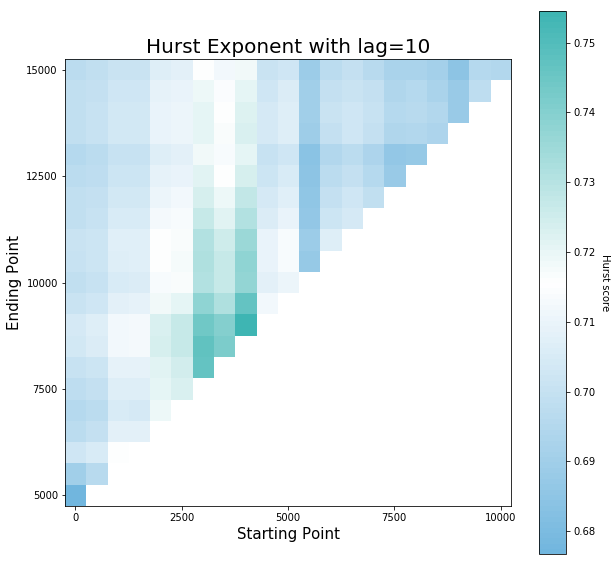

In [446]:
saved_hurst=np.zeros((21,21))
lag=10
new_model_index=[100 for i in range(len(new_model_return)+1)]
for n,i in enumerate(new_model_return):
    new_model_index[n+1]=new_model_index[n]*(1+i)

new_model_index=np.array(new_model_index)
nlag_return=np.log(new_model_index[lag:])-np.log(new_model_index[:-lag])
for n1,start in enumerate([i for i in range(0,10001,500)]):
    for n2,end in enumerate([i for i in range(5000,15001,500)]):
        if n2>=n1:
            list_RS=[]
            list_n=[]
            #for n in range(10,len(N_return)//2+1):
            for n in range(10,1000):
                N_return=nlag_return[start:end]
                list_RS.append(RS_value(N_return,n))
                list_n.append(n)
            saved_hurst[n2,n1]=np.polyfit(np.log(list_n),np.log(list_RS),1)[0]
            print('\r' +'current is: {0},{1}'.format(n1,n2),end='')
            print('\r',end='')
        else:
            saved_hurst[n2,n1]=np.nan
colors = ['#71b6de','#ffffff','#3eb5b3']  # R -> G -> B
n_bin = 100  # Discretizes the interpolation into bins
cmap_name='111'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
#origin='lower', 

fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(saved_hurst,cmap=cm,origin='lower', interpolation='nearest')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Hurst score',rotation=-90, va="bottom")
# We want to show all ticks...
ax.set_xticks(np.arange(0,21,5))
ax.set_yticks(np.arange(0,21,5))
# ... and label them with the respective list entries.
ax.set_xticklabels([2500*i for i in range(5)])
ax.set_yticklabels([2500*i+5000 for i in range(5)])

plt.title('Hurst Exponent with lag={}'.format(lag),fontsize=20)
plt.xlabel('Starting Point', fontsize=15)
plt.ylabel('Ending Point', fontsize=15)
plt.show()



# appendix code (not used)

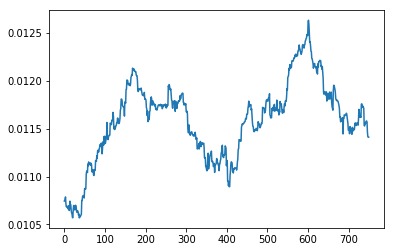

0.03800305557271679 0.011580028082463384
0.0017843322740562213 0.00017714453290607372


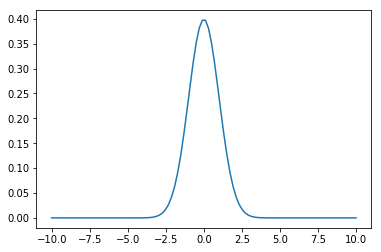

In [142]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 10*sigma, mu + 10*sigma, 100)



In [438]:
s='aabbccaabbcc'
t='aabbcc'

def gcdOfStrings(str1: str, str2: str) -> str:

    str1Length, str2Length = len(str1), len(str2)

    if str2Length > str1Length: # Ensures the longer string is str1 and shorter or equal string is str2
        return gcdOfStrings(str2, str1)

    if str1[:str2Length] == str2: # Check if shorter string (str2) is a prefix in longer string (str1)

        if str1Length == str2Length: # If str1 and str2 are of the same length then we have found the common divisor
            return str2

        return gcdOfStrings(str2, str1[str2Length:]) # return the gcd of the str2 and str1 minus the prefix

    return ""

gcdOfStrings(s,t)


'aabbcc'

In [487]:
def find_common(s):
    n=len(s)

    for i in range(int(n/2)):
        if n%(i+1)==0:
            if s.count(s[:i+1])==n/(i+1):
                return i+1
    return n

def find_common_divisor(s,t):
    len1,len2 = len(s),len(t)
    if len1<len2:
        return ""
    elif s[:len2]==t:
        if s==t:
            return t
        else:
            return find_common_divisor(s[:len2], t)
    else:
        return ""
def findSmallestDivisor(s, t):
       
    common_divisor = find_common_divisor(s,t)
    if common_divisor == "":
        return -1
    else:
        return find_common(common_divisor)

In [499]:
s='bcdbcdbcd'
t='bcdbcd'
findSmallestDivisor(s,t)


3

In [486]:
find_common_divisor(s,t)

'ABC'

In [500]:
def coprimeCount(A):
    ans=[]
    for num in A:
        p=2
        remainder=num
        numprimelist=[]
        while remainder>1:
            if remainder%p==0:
                numprimelist.append(p)
                while remainder%p==0:
                    remainder=remainder//p
            p+=1
            
        result=num    
        for p in numprimelist:
            result=result*(1-1/p)
        result=int(result)
        ans.append(result)
    return ans

In [506]:
A=[1]
coprimeCount(A)

[1]

In [508]:
def  coprimeCount( A):
    ans=[]
    for num in A:
        p=2
        remainder=num
        plist=[]
        while remainder>1:
            if remainder%p==0:
                plist.append(p)
                while remainder%p==0:
                    remainder=remainder//p
            p+=1
        phi=num
        for p in plist:
            phi=phi*(1-1/p)
        phi=int(phi)
        ans.append(phi)
    return ans
coprimeCount([1,2,3])

[1, 1, 2]

In [220]:
(1+r)**1500

1.3870127014822193

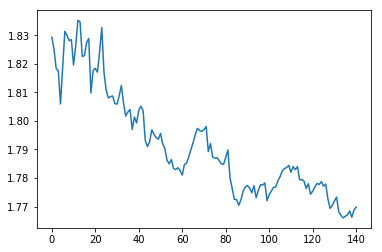

In [2270]:
list_RS=[]
list_n=[]
list_RSn=[]
#for n in range(10,len(N_return)//2+1):

#N_return=np.log(DJ_daily.loc[[20*i for i in range(1,len(DJ_daily)//20)],'Last'].values)-np.log(DJ_daily.loc[[20*i for i in range(len(DJ_daily)//20 -1)],'Last'].values)

N_return=(np.log(DJ_daily.loc[20:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-20].values))
N=len(N_return)

n=20
A=N//n
for A in range(10,151):
    N_return2=N_return[:A*n]
    list_of_sublist = np.split(N_return2,A)
    mean_of_sublist = np.mean(list_of_sublist,axis=1)
    list_of_sublist = list_of_sublist - mean_of_sublist[:, None]
    cumu_of_sublist = np.cumsum(list_of_sublist,axis=1)
    RS_value = np.mean((np.max(cumu_of_sublist,axis=1)-np.min(cumu_of_sublist,axis=1))/np.std(list_of_sublist,axis=1))
    list_RSn.append(RS_value/np.sqrt(n))
plt.plot(list_RSn)


current is: 8849

0.6238181436199658

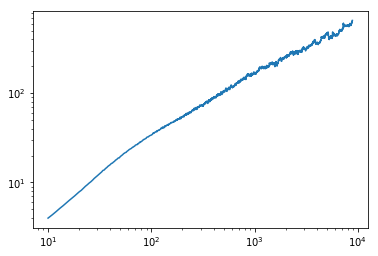

current is: 50

0.12393208575106415

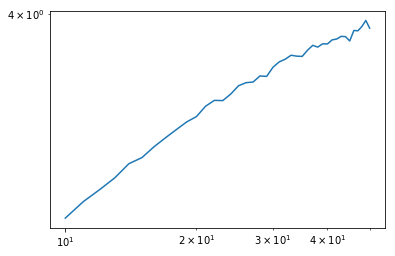

In [2239]:
n=10
N_return=(np.log(DJ_daily.loc[1:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-1].values))
list_RS=[]
list_n=[]
for n in range(10,51):
    N=len(N_return)
    A=N//n
    N_return=N_return[:A*n]
    list_of_sublist=[N_return[(i*n):(i*n+n)] for i in range(A)]
    mean_of_sublist=[np.mean(i) for i in list_of_sublist]
    cumu_of_sublist=[[sum([list_of_sublist[a][i]-mean_of_sublist[a] for i in range(k+1)]) for k in range(n)] for a in range(A)]
    Range_of_sublist=[max(i)-min(i) for i in cumu_of_sublist]
    RS_value=np.mean([Range_of_sublist[n]/np.std(R) for n,R in enumerate(cumu_of_sublist)])
    list_RS.append(RS_value)
    list_n.append(n)
    print('\r' +'current is: {}'.format(n),end='')
plt.loglog(list_n,list_RS)
np.polyfit(np.log(list_n),np.log(list_RS),1)[0]

In [2232]:
n=10
N_return=(np.log(DJ_daily.loc[1:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-1].values))
N=len(N_return)
A=N//n
N_return=N_return[:A*n]
list_of_sublist = np.split(N_return,A)
mean_of_sublist = np.mean(list_of_sublist,axis=1)
list_of_sublist = list_of_sublist - mean_of_sublist[:, None]
cumu_of_sublist = np.cumsum(list_of_sublist,axis=1)
RS_value = (np.max(cumu_of_sublist,axis=1)-np.min(cumu_of_sublist,axis=1))/np.std(list_of_sublist,axis=1)
RS_value[15]

3.2655510081819172

In [2233]:
ts = list(N_return)
N = len(ts)
if N < 20:
    raise ValueError("Time series is too short! input series ought to have at least 20 samples!")
max_k = int(np.floor(N/2))
R_S_dict = []
k=10
R,S = 0,0
# split ts into subsets
subset_list = [ts[i:i+k] for i in range(0,N,k)]
if np.mod(N,k)>0:
    subset_list.pop()
    #tail = subset_list.pop()
    #subset_list[-1].extend(tail)
# calc mean of every subset
mean_list=[np.mean(x) for x in subset_list]
R=[]
# for i in range(len(subset_list)):
i=15
cumsum_list = pd.Series(subset_list[i]-mean_list[i]).cumsum()
(max(cumsum_list)-min(cumsum_list))/np.std(subset_list[i])

    

C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


3.2655510081819172

In [2220]:
np.max(cumu_of_sublist,axis=1)-np.min(cumu_of_sublist,axis=1)

array([0.0785926 , 0.04843265, 0.0202892 , ..., 0.01537941, 0.02911551,
       0.0169627 ])

In [2221]:
max(cumsum_list)-min(cumsum_list)

0.07859259996333376

In [2211]:
cumu_of_sublist

array([[ 3.26291824e-03,  1.93125083e-03, -2.21399027e-02, ...,
        -2.61770056e-02, -1.38669270e-02,  3.46944695e-18],
       [ 2.95813495e-02,  7.45558478e-03, -4.23267976e-03, ...,
        -1.57333200e-02, -1.88512955e-02,  6.93889390e-18],
       [-8.00739798e-03,  3.04516668e-03,  3.28444836e-03, ...,
         1.22818046e-02, -2.30082131e-03,  0.00000000e+00],
       ...,
       [-2.08656032e-03,  7.29644551e-03,  1.44010226e-03, ...,
        -6.26689781e-03, -4.05536526e-03, -3.46944695e-18],
       [-5.06049620e-03, -1.31770813e-02,  1.25653542e-03, ...,
         4.83076033e-03,  5.75614535e-03,  3.46944695e-18],
       [ 1.19252730e-02,  6.94795153e-03, -2.89601570e-03, ...,
         2.58826675e-03, -4.07216278e-03,  8.67361738e-19]])

In [2198]:
def hurst(ts,p,n):
    ts = list(ts)
    N = len(ts)
    if N < 20:
        raise ValueError("Time series is too short! input series ought to have at least 20 samples!")
    max_k = int(np.floor(N/2))
    R_S_dict = []
    for k in range(p,n):
        R,S = 0,0
        # split ts into subsets
        subset_list = [ts[i:i+k] for i in range(0,N,k)]
        if np.mod(N,k)>0:
            subset_list.pop()
            #tail = subset_list.pop()
            #subset_list[-1].extend(tail)
        # calc mean of every subset
        mean_list=[np.mean(x) for x in subset_list]
        R=[]
        for i in range(len(subset_list)):
            cumsum_list = pd.Series(subset_list[i]-mean_list[i]).cumsum()
            R.append((max(cumsum_list)-min(cumsum_list))/np.std(subset_list[i]))
        R_S_dict.append({"R":R,"n":k})
    
    log_R_S = []
    log_n = []
    for i in range(len(R_S_dict)):
        R_S = np.mean(R_S_dict[i]["R"])
        log_R_S.append(np.log(R_S))
        log_n.append(np.log(R_S_dict[i]["n"]))
    Hurst_exponent = np.polyfit(log_n,log_R_S,1)[0]
    return Hurst_exponent

hurst(N_return,10,41)

[array([ 0.00142857, -0.00316601, -0.0259055 , -0.05502413,  0.05323794,
         0.0105655 , -0.00490274, -0.01708542,  0.01047573,  0.01203258]),
 array([ 0.03102691, -0.02068021, -0.01024271,  0.00249273,  0.01278104,
        -0.02006895,  0.0033382 , -0.00281588, -0.00167242,  0.02029685]),
 array([-0.00978633,  0.00927364, -0.00153965, -0.00773399, -0.00352588,
         0.0041468 ,  0.00772921, -0.00051343, -0.01636155,  0.00052189]),
 array([-0.00418279, -0.07516448, -0.01720546,  0.05609156,  0.00843978,
        -0.00670273, -0.01365172, -0.00817052,  0.02377282, -0.00553657]),
 array([-0.0022887 ,  0.00174425,  0.01994998,  0.01325787, -0.00995349,
        -0.0151185 ,  0.00849879, -0.00720317, -0.0121582 , -0.00503669]),
 array([ 0.01870433,  0.02363572,  0.00273196,  0.        , -0.00020989,
         0.01230849, -0.01493578,  0.00021044,  0.00115662,  0.00492689]),
 array([ 0.00020912,  0.01370596,  0.01260456, -0.00602627, -0.00853959,
         0.00505026, -0.00981464,  0.00

In [2041]:
BBB[0]

array([ 3.26291824e-03,  1.93125083e-03, -2.21399027e-02, -7.53296817e-02,
       -2.02573933e-02, -7.85754234e-03, -1.09259334e-02, -2.61770056e-02,
       -1.38669270e-02,  3.46944695e-18])